In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'http://apmonitor.com/pds/uploads/Main/manufacturing.txt'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        70 non-null     float64
 1   wall_thickness      70 non-null     float64
 2   infill_density      70 non-null     int64  
 3   infill_pattern      70 non-null     object 
 4   nozzle_temperature  70 non-null     int64  
 5   bed_temperature     70 non-null     int64  
 6   print_speed         70 non-null     int64  
 7   material            70 non-null     object 
 8   fan_speed           70 non-null     int64  
 9   roughness           70 non-null     int64  
 10  tension_strength    70 non-null     int64  
 11  elongation          70 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.7+ KB


In [3]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8.0,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7.0,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1.0,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4.0,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6.0,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strength,elongation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.097286,5.464286,54.600000,221.785714,73.214286,68.857143,48.614286,155.185714,19.942857,1.642143
std,0.061971,2.934455,27.926612,14.843037,24.197792,45.501803,36.060454,96.070520,9.282812,0.756596
min,0.020000,1.000000,10.000000,200.000000,60.000000,40.000000,0.000000,-1.000000,4.000000,0.400000
25%,0.052500,3.000000,32.500000,210.000000,65.000000,40.000000,25.000000,75.000000,12.000000,1.100000
50%,0.100000,5.500000,50.000000,220.000000,70.000000,60.000000,50.000000,141.000000,18.500000,1.500000
75%,0.150000,8.000000,80.000000,230.000000,75.000000,63.750000,75.000000,218.000000,27.000000,2.175000
max,0.200000,12.000000,100.000000,250.000000,260.000000,360.000000,100.000000,368.000000,38.000000,3.300000


<AxesSubplot:ylabel='material'>

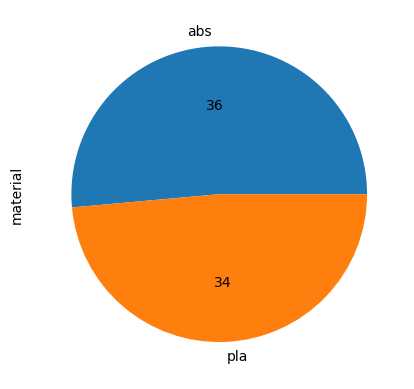

In [5]:
df['material'].value_counts().plot(kind='pie', autopct=lambda p: f'{p * df.material.value_counts().sum() / 100:.0f}')

layer_height             AxesSubplot(0.125,0.53;0.133621x0.35)
wall_thickness        AxesSubplot(0.285345,0.53;0.133621x0.35)
infill_density         AxesSubplot(0.44569,0.53;0.133621x0.35)
nozzle_temperature    AxesSubplot(0.606034,0.53;0.133621x0.35)
bed_temperature       AxesSubplot(0.766379,0.53;0.133621x0.35)
print_speed              AxesSubplot(0.125,0.11;0.133621x0.35)
fan_speed             AxesSubplot(0.285345,0.11;0.133621x0.35)
roughness              AxesSubplot(0.44569,0.11;0.133621x0.35)
tension_strength      AxesSubplot(0.606034,0.11;0.133621x0.35)
elongation            AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

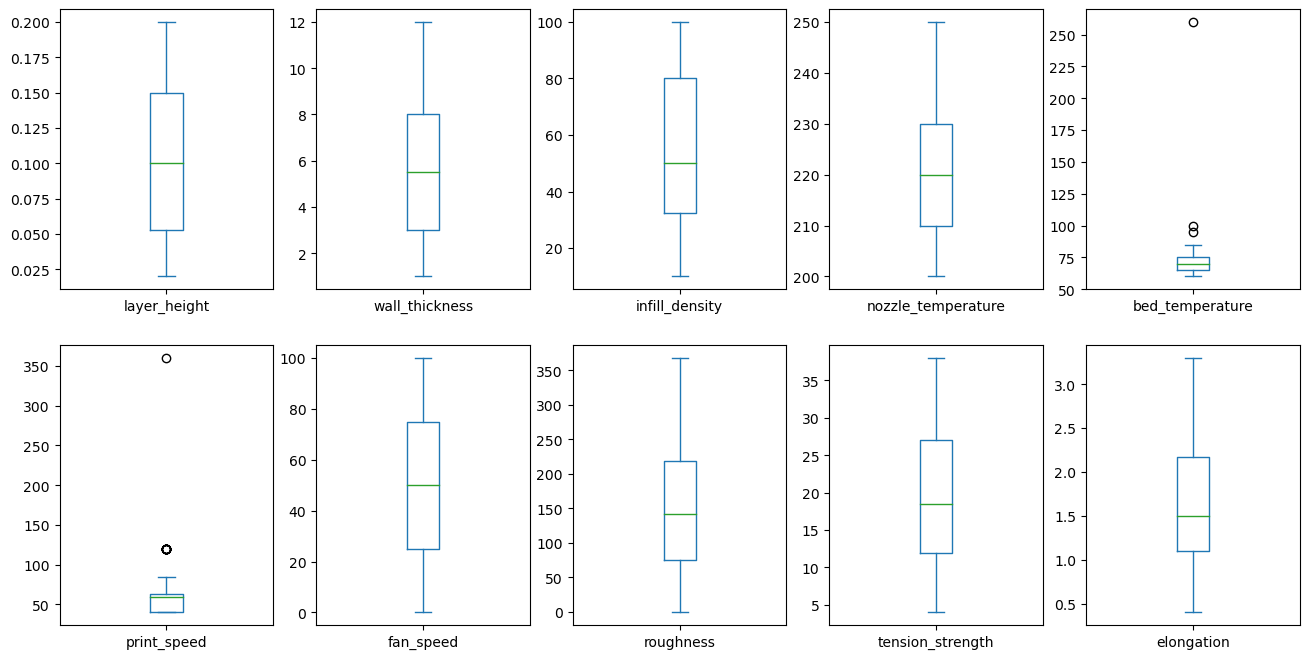

In [6]:
df.plot(kind='box', subplots = True, layout = (2,5), figsize=(16,8))

In [7]:
def outlierdetection(feature):
    q3 = df[feature].quantile(0.75)
    
    return df[feature] > q3+1.5*q3

for i, j in df.select_dtypes(exclude='object').items():
    outliers = outlierdetection(i)
    print(df[outliers][i])
    print('\n')


Series([], Name: layer_height, dtype: float64)


Series([], Name: wall_thickness, dtype: float64)


Series([], Name: infill_density, dtype: int64)


Series([], Name: nozzle_temperature, dtype: int64)


63    260
Name: bed_temperature, dtype: int64


63    360
Name: print_speed, dtype: int64


Series([], Name: fan_speed, dtype: int64)


Series([], Name: roughness, dtype: int64)


Series([], Name: tension_strength, dtype: int64)


Series([], Name: elongation, dtype: float64)




In [8]:
df = df.drop(index=63).reset_index()
df = df.drop('index', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        69 non-null     float64
 1   wall_thickness      69 non-null     float64
 2   infill_density      69 non-null     int64  
 3   infill_pattern      69 non-null     object 
 4   nozzle_temperature  69 non-null     int64  
 5   bed_temperature     69 non-null     int64  
 6   print_speed         69 non-null     int64  
 7   material            69 non-null     object 
 8   fan_speed           69 non-null     int64  
 9   roughness           69 non-null     int64  
 10  tension_strength    69 non-null     int64  
 11  elongation          69 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 6.6+ KB


<AxesSubplot:>

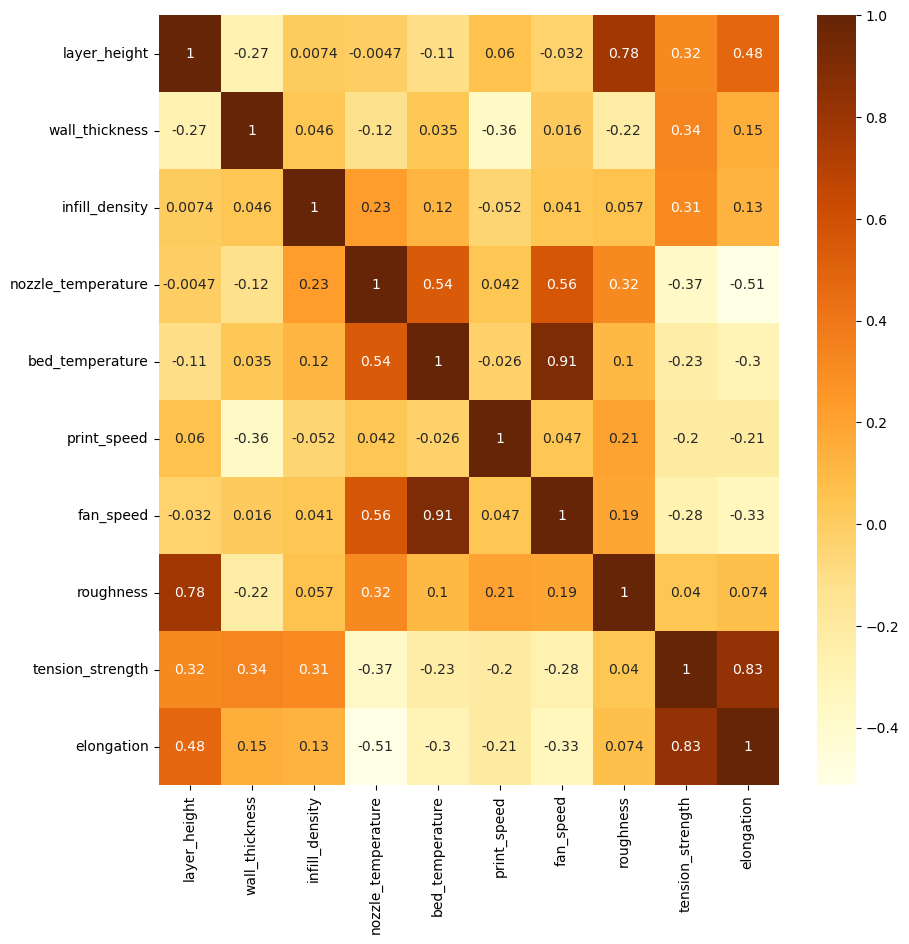

In [9]:
plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), cmap="YlOrBr", annot=True)

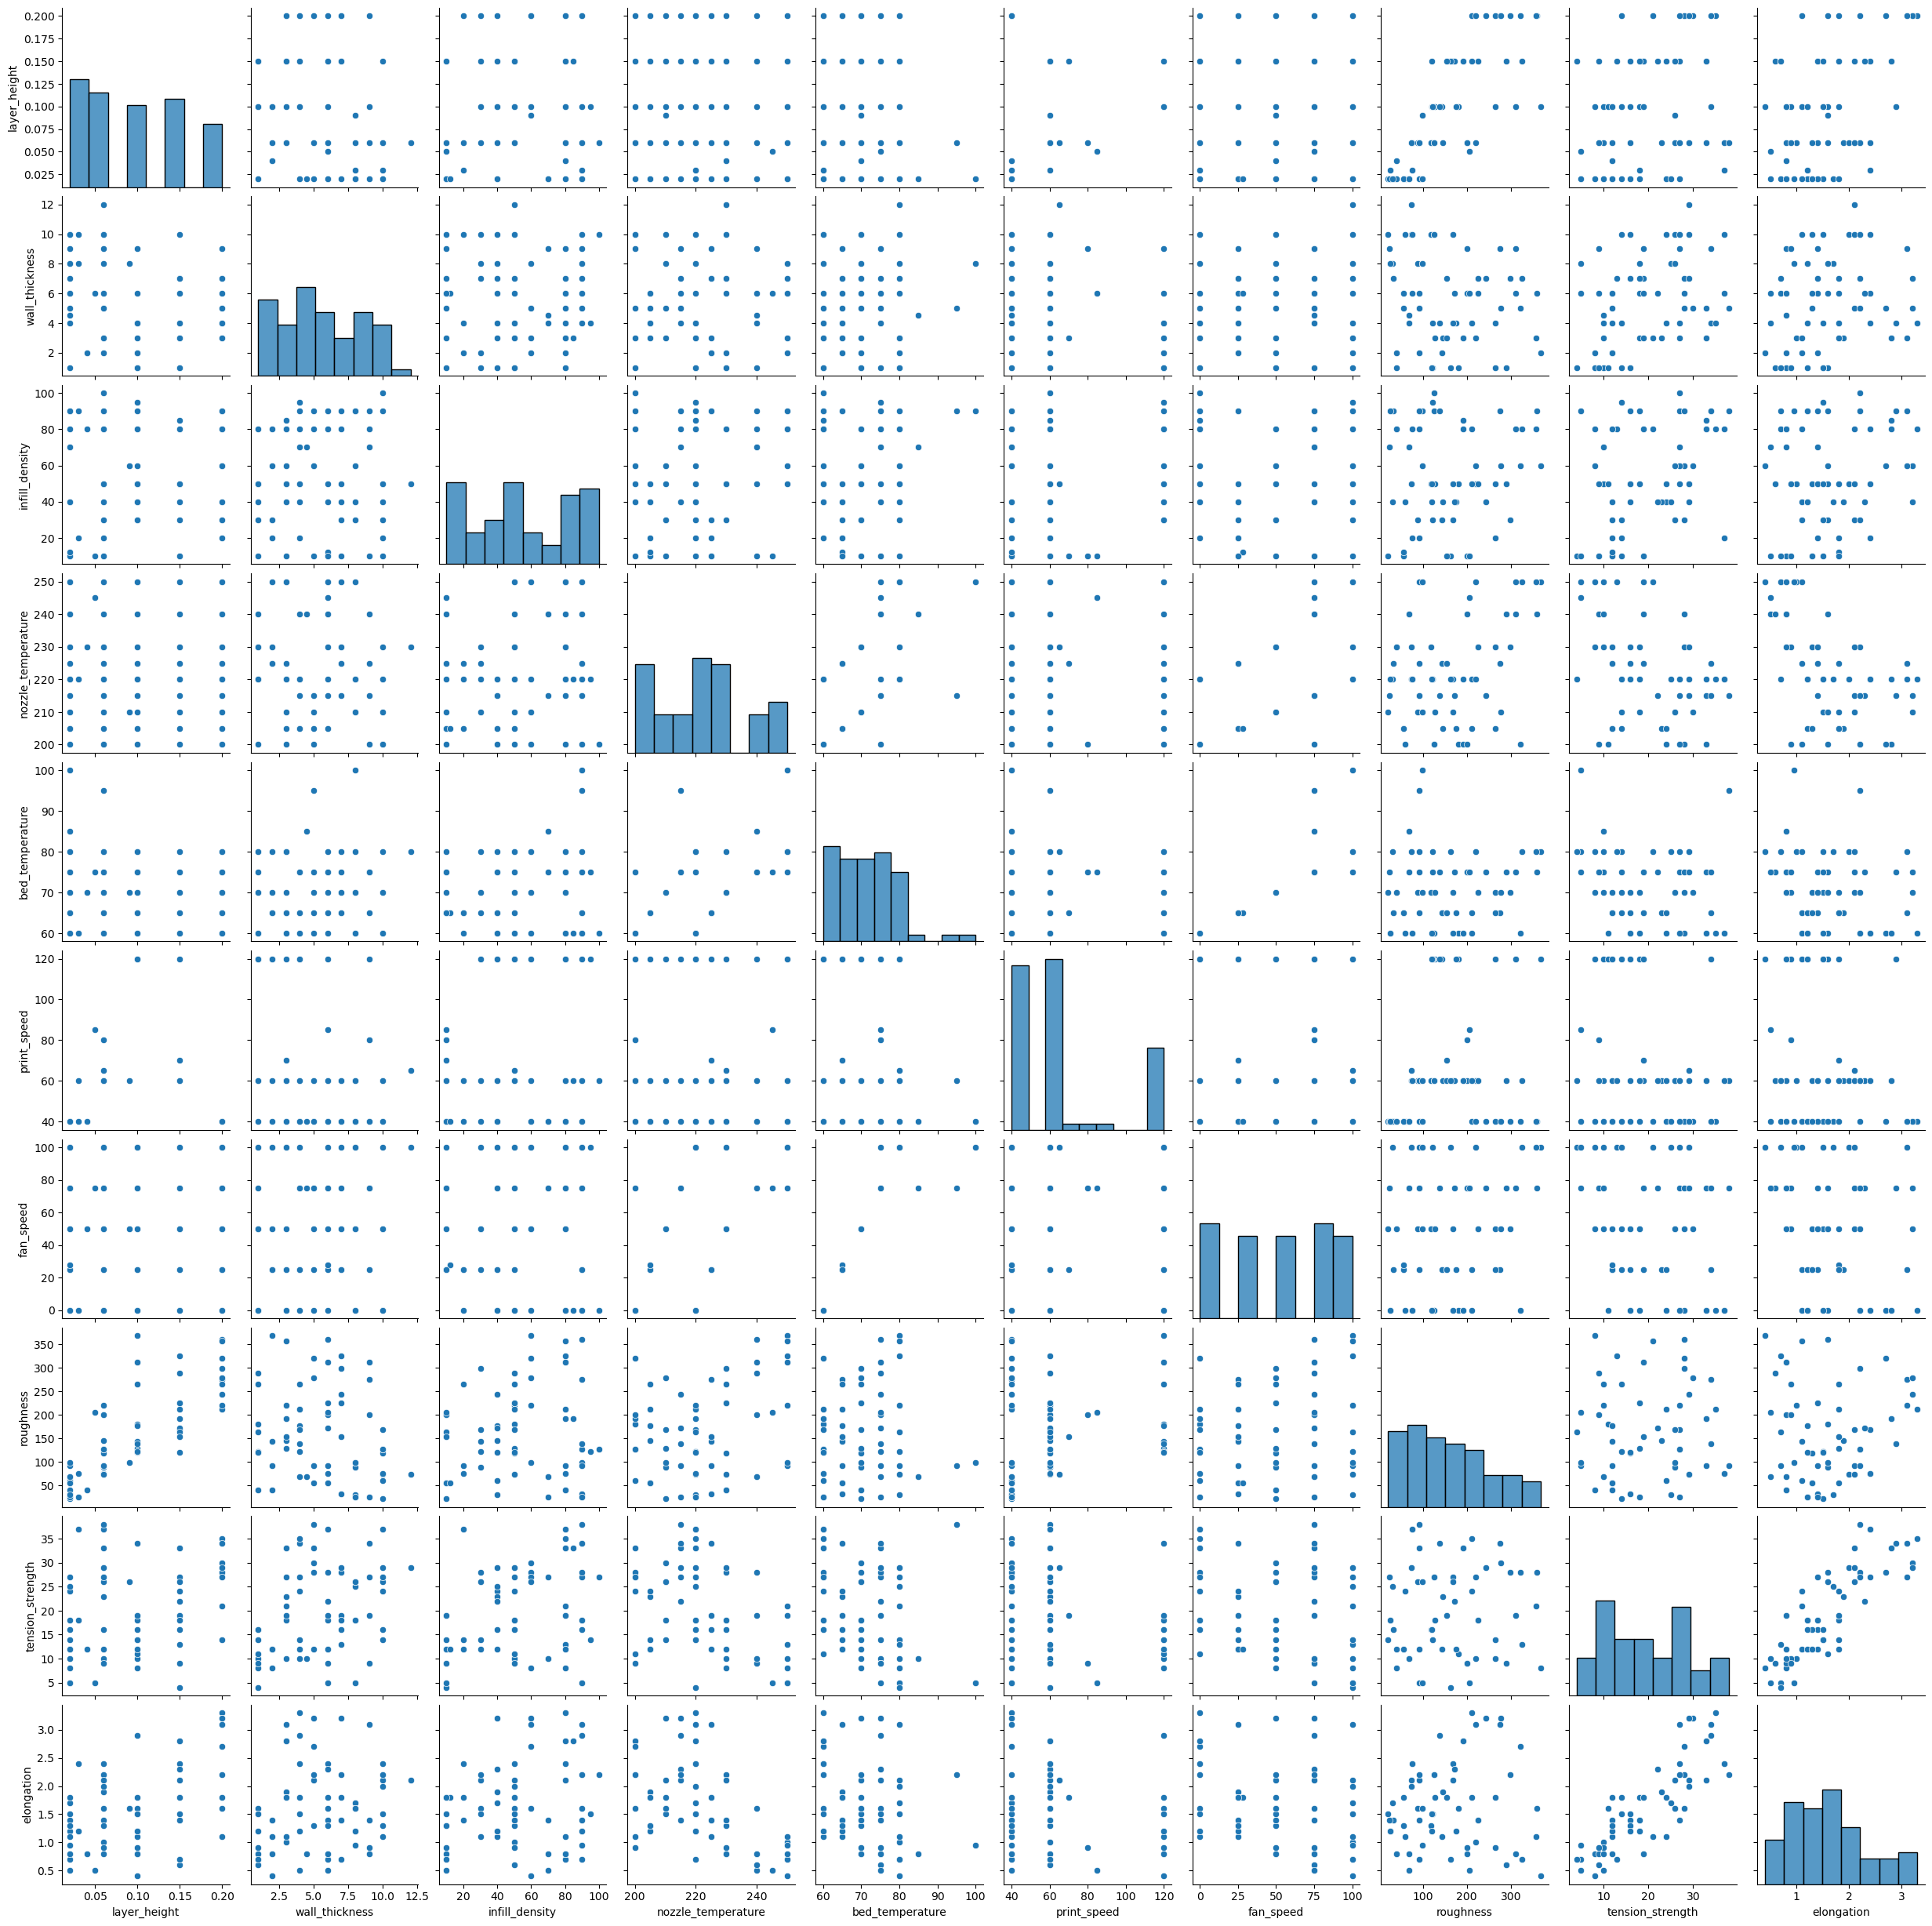

In [10]:
sns.pairplot(df)

In [15]:
df.to_csv('additive_manufacturing.csv', index=False)